<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2021/22 Term 2
</div>

# CS105 Group Project Submission (Final)

-----
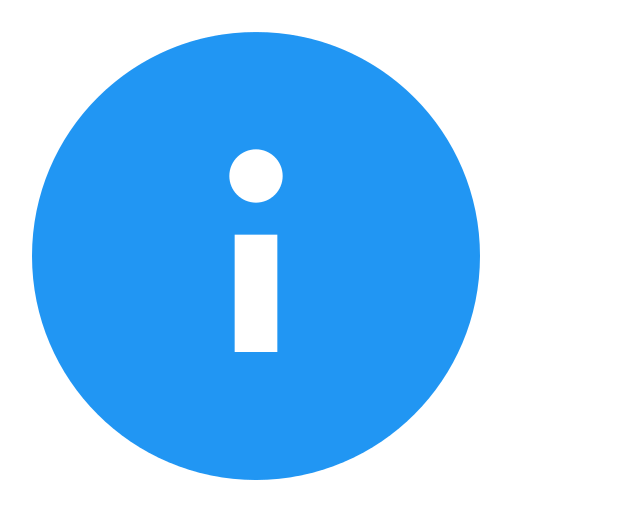Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.

Include both Part I and Part II to produce a self-contained notebook. You may fine-tune Part I codes and/or findings based on feedback received on Part I submission.
<br>
-----

#### Section: G2
#### Team: T2
#### Members:
1. Chen Zhao Xing
2. Chong Yuan Sheng
3. Lee Shao Dong
4. Novia Antony
5. Tan Zheng

#### Dataset: Housing

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

In [1]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 

The dataset contains data from a census survey with regards to housing in a region. We are interested in investigating the relational factors that affect the welfare of a town, hence each row corresponds to a town, and values of each attribute is for each town.

**b.** State the size of the dataset

**Response.** 

In [3]:
n_rows, n_cols = df.shape
print(f"# of rows is {n_rows}")
print(f"# of columns is {n_cols}")

# of rows is 506
# of columns is 14


Since there are 506 rows and 14 columns, the dataset has a **sample size of 506** towns being evaluated and data of **14 attributes** being collected.

**c.** For each variable, describe what it represents and its data type (numerical or categorical)


**Response.**

Using df.info(), we will now explore the data type of each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     488 non-null    float64
 1   Crime_Rate             506 non-null    object 
 2   Residential_Area       506 non-null    object 
 3   Non_Retail             506 non-null    float64
 4   River                  506 non-null    object 
 5   Pollutants             506 non-null    float64
 6   Rooms                  506 non-null    float64
 7   Old_Housing            506 non-null    float64
 8   Distance_Office        506 non-null    float64
 9   Highway_Access         491 non-null    object 
 10  Tax_Rate               506 non-null    int64  
 11  Student_Teacher_Ratio  506 non-null    float64
 12  Low_Income             506 non-null    float64
 13  Price                  506 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 55.5+ KB


In addition, we have inserted a data dictionary to summarise and describe the variables explored in this project.

|Name|Explanation |Data Type|Details|
|---|---|---|---|
|Id| Identification Number |Categorical|
|Crime_Rate|Crime rate per capita |Categorical|"High", "Moderate", "Low"|
|Residential_Area|Proportion of residential area |Categorical|"Very High", "High" "Moderate", "Low", "Very Low"|
|Non-Retail|Percentage of business areas used for non-retail |Numerical| 
|River|Near Bridge |Categorical|"Near", "Far"|
|Pollutants|Concentration of pollutants (parts per 10 million)|Numerical|
|Rooms |Number of rooms per unit|Numerical|
|Old_Housing |Percentage of units built before second world war|Numerical| 
|Distance_Office|Weighted distances to major office areas  |Numerical|
|Highway_Access|Accessibility to major highways|Categorical|"High”, “Moderate”, “Low”|
|Tax_Rate|Property tax rate per \$10,000 |Numerical|
|Student_Teacher_Ratio|Student to teacher ratio |Numerical|
|Low_Income |Percentage of low income households |Numerical|
|Price|Median price of homes in (in \$1000s) |Numerical|

In [5]:
### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [6]:
df.count() / n_rows 

ID                       0.964427
Crime_Rate               1.000000
Residential_Area         1.000000
Non_Retail               1.000000
River                    1.000000
Pollutants               1.000000
Rooms                    1.000000
Old_Housing              1.000000
Distance_Office          1.000000
Highway_Access           0.970356
Tax_Rate                 1.000000
Student_Teacher_Ratio    1.000000
Low_Income               1.000000
Price                    1.000000
dtype: float64

**Response.** 

There are **2 columns with missing data namely ID and Highway_Access**. Firstly, as ID is a categorical data and with the assumption that the values are all **unique**. We are unable to impute the missing value as the ID does not have a mean nor a mode. Therefore, we have decided to **drop** the column, ID, since it is an identifier data that will not be as helpful for our analysis.

Secondly, even though highway_access is a categorical data, it can only take the form of 3 types of value being "High", "Moderate" or "Low", therefore, we have decided to impute the missing value with the **mode** of the current highway_access.

Hence the following process shown below:

In [7]:
df.drop(columns=["ID"], inplace=True)
df.head()

,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
0,Low,Very Low,2.31,Far,0.538,6.575,65.2,4.0900,Low,296,15.3,4.98,24.0
1,Low,Very Low,7.07,Far,0.469,6.421,78.9,4.9671,Low,242,17.8,9.14,21.6
2,Low,Very Low,7.07,Far,0.469,7.185,61.1,4.9671,Low,242,17.8,4.03,34.7
3,Low,Very Low,2.18,Far,0.458,6.998,45.8,6.0622,Low,222,18.7,2.94,33.4
4,Low,Very Low,2.18,Far,0.458,7.147,54.2,6.0622,Low,222,18.7,5.33,36.2


In [8]:
highwayaccess_mode = df.Highway_Access.mode()[0]  
df.Highway_Access.value_counts()  # Verifying the mode

Moderate    279
High        130
Low          82
Name: Highway_Access, dtype: int64

Filling in the missing values with the computed mode:

In [9]:
df.Highway_Access.fillna(highwayaccess_mode, inplace=True)
df.count() #verifying that values have been inputed

Crime_Rate               506
Residential_Area         506
Non_Retail               506
River                    506
Pollutants               506
Rooms                    506
Old_Housing              506
Distance_Office          506
Highway_Access           506
Tax_Rate                 506
Student_Teacher_Ratio    506
Low_Income               506
Price                    506
dtype: int64

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

Assuming that for categorical data type, Crime_rate, Residental_Area, River and Highway_access, there will be **no outliers** since data regarding these factors are simply the composition of the sample we have selected.

Hence, we will proceed to check for outliers for factors of numerical data type, **Non_Retail, Pollutants, Rooms, Old_Housing, Distance_Office, Tax_rate, Student_Teacher_Ratio, Low_Income and Price.**

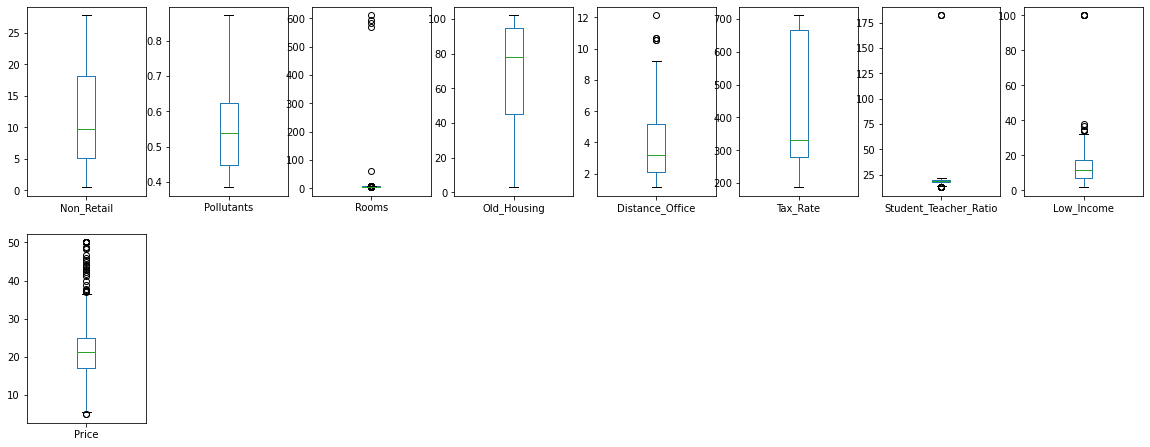

In [10]:
#box plot all the tables and find the 
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio", "Low_Income", "Price"]]
df_numerics.plot(kind='box',  subplots=True, layout=(4, 8), figsize=(20, 16))
plt.show()
#Columns to clean - Rooms, Distance_office, student_teacher_ratio, low_income, Price

Using the definition of an outlier, it is a point which falls **more than 1.5 times the interquartile range(IQR) above the upper quartile or below the lower quartile.**

Hence, by generating the boxplots for each factor, we can determine the outliers which lies outside the range of value.

From the boxplots shown above, there are outliers in the following variables:
Rooms, Distance_office, Student_Teacher_ratio, Low_Income and Price.

Thus, having a closer look at the variables consisting of outliers below:

## Outliers in 'Rooms'

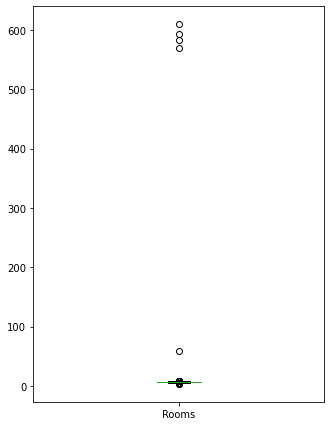

In [11]:
df_numerics = df[["Rooms"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

In [12]:
Q1_Rooms = df.Rooms.quantile(0.25)
Q3_Rooms = df.Rooms.quantile(0.75)

IQR_Rooms = Q3_Rooms - Q1_Rooms

lower_limit_Rooms = Q1_Rooms - 1.5*IQR_Rooms
upper_limit_Rooms = Q3_Rooms + 1.5*IQR_Rooms

print(f"Acceptable range of values for rooms: {lower_limit_Rooms, upper_limit_Rooms}\n")

print("Outlier Values:")

df_rooms_outliers = df.Rooms[(df.Rooms > upper_limit_Rooms) | (df.Rooms < lower_limit_Rooms)]
df_rooms_outliers

Acceptable range of values for rooms: (4.768999999999999, 7.753000000000001)

Outlier Values:


32      59.500
33     570.100
34     609.600
35     593.300
36     584.100
97       8.069
98       7.820
162      7.802
163      8.375
166      7.929
180      7.765
186      7.831
195      7.875
203      7.853
204      8.034
224      8.266
225      8.725
226      8.040
232      8.337
233      8.247
253      8.259
257      8.704
262      8.398
267      8.297
280      7.820
283      7.923
364      8.780
365      3.561
367      3.863
374      4.138
384      4.368
386      4.652
406      4.138
412      4.628
414      4.519
Name: Rooms, dtype: float64

In the data for Rooms, there are **5 extreme outliers of value: 59.500, 570.100, 609.600, 593.300 and 584.100.** 

Upon analysis and research, we found that it is unrealistic and impossible for a town to have an average of 59.500 and above rooms per unit. Hence, it is suggested that these outliers are most likely a mistake in data entry.

Considering that we have sufficient data for anaylsis(sample size:506), it is safe to remove the 5 extreme outliers. As for the remaining outliers, they will be kept unchanged since these outliers are closer to the acceptable range of values and may possibly be valuable for our exploratory analysis. 



In [13]:
df = df.drop([32,33,34,35,36])

**Boxplot after dropping outliers**

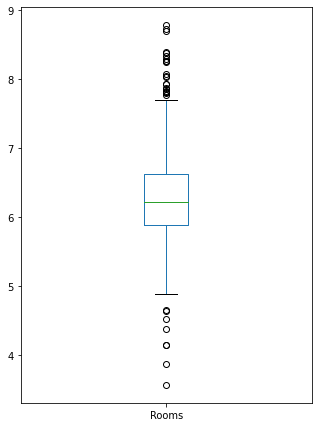

In [14]:
df_numerics = df[["Rooms"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

## Outliers in 'Distance_Office'

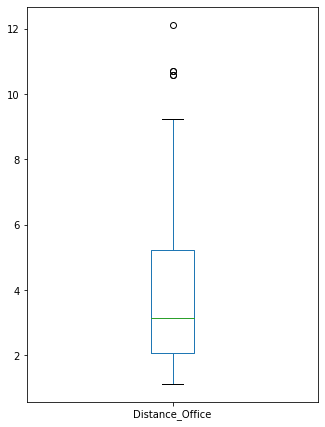

In [15]:
df_numerics = df[["Distance_Office"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

In [16]:
Q1_Distance_Office = df.Distance_Office.quantile(0.25)
Q3_Distance_Office = df.Distance_Office.quantile(0.75)

IQR_Distance_Office = Q3_Distance_Office - Q1_Distance_Office

lower_limit_Distance_Office = Q1_Distance_Office - 1.5*IQR_Distance_Office
upper_limit_Distance_Office = Q3_Distance_Office + 1.5*IQR_Distance_Office

print("Since the lower limit is not possible to be negative, we will set it to be a value of 0\n")
lower_limit_Distance_Office = 0

print(f"Acceptable range of values for Distance_Office: {lower_limit_Distance_Office, upper_limit_Distance_Office}\n")

print("Outlier Values:")

df_Distance_Office_outliers = df.Distance_Office[(df.Distance_Office > upper_limit_Distance_Office) | (df.Distance_Office < lower_limit_Distance_Office)]
df_Distance_Office_outliers

Since the lower limit is not possible to be negative, we will set it to be a value of 0

Acceptable range of values for Distance_Office: (0, 9.9042)

Outlier Values:


351    10.7103
352    10.7103
353    12.1265
354    10.5857
355    10.5857
Name: Distance_Office, dtype: float64

Similarly, the outliers in distance_office only differ from the upper limit slightly. Hence, these outliers are **not signficant enough** to affect the analysis between it and other dependent variables. In addition, the outlier values may provide invaluable insight for the exploratory analysis, hence we will be keeping the values of the outliers. 

## Outliers in 'Student_Teacher_Ratio'

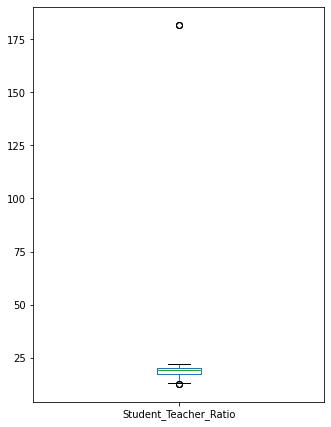

In [17]:
df_numerics = df[["Student_Teacher_Ratio"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

In [18]:
Q1_Student_Teacher_Ratio = df.Student_Teacher_Ratio.quantile(0.25)
Q3_Student_Teacher_Ratio = df.Student_Teacher_Ratio.quantile(0.75)

IQR_Student_Teacher_Ratio = Q3_Student_Teacher_Ratio - Q1_Student_Teacher_Ratio

lower_limit_Student_Teacher_Ratio = Q1_Student_Teacher_Ratio - 1.5*IQR_Student_Teacher_Ratio
upper_limit_Student_Teacher_Ratio = Q3_Student_Teacher_Ratio + 1.5*IQR_Student_Teacher_Ratio

print(f"Acceptable range of values for Student_Teacher_Ratio: {lower_limit_Student_Teacher_Ratio, upper_limit_Student_Teacher_Ratio}\n")

print("Outlier Values:")

df_Student_Teacher_Ratio_outliers = df.Student_Teacher_Ratio[(df.Student_Teacher_Ratio > upper_limit_Student_Teacher_Ratio) | (df.Student_Teacher_Ratio < lower_limit_Student_Teacher_Ratio)]
df_Student_Teacher_Ratio_outliers


Acceptable range of values for Student_Teacher_Ratio: (12.950000000000003, 24.549999999999997)

Outlier Values:


92     182.0
93     182.0
94     182.0
196     12.6
197     12.6
198     12.6
Name: Student_Teacher_Ratio, dtype: float64

In the data for Student_teacher_Ratio, there are **3 extreme outliers of value: 182.0, 182.0 and 182.0.**

However, we find that it could be possible for there to be a student to teacher ratio of 182 in the event of a lecture style education. 

While these extreme outliers are an invaluable points of data that can give more insights on our data pattern and analysis, we have still decided to remove these outliers for the purpose of this project. Since these outliers can potentially skew data results and cause our statistical model to be less robust, we will remove these outliers for a smoother analysis.

For the other outliers of value 12.6, they are kept in the database since it only differs from the lower limit by 0.35. Hence, these outliers are **not signficant enough** to affect the analysis between it and other dependent variables. In addition, the outlier values may provide invaluable insight for the exploratory analysis, hence we will be keeping the values of the outliers. 

In [19]:
df = df.drop([92,93,94])

**Boxplot after dropping outliers**

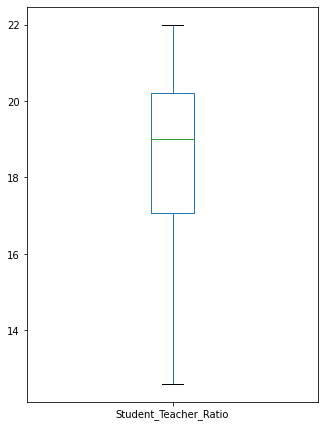

In [20]:
df_numerics = df[["Student_Teacher_Ratio"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

# Outliers in 'Low_Income'

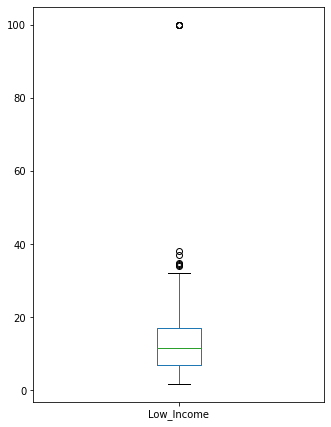

In [21]:
df_numerics = df[["Low_Income"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

In [22]:
Q1_Low_Income = df.Low_Income.quantile(0.25)
Q3_Low_Income = df.Low_Income.quantile(0.75)

IQR_Low_Income = Q3_Low_Income - Q1_Low_Income

lower_limit_Low_Income = Q1_Low_Income - 1.5*IQR_Low_Income
upper_limit_Low_Income = Q3_Low_Income + 1.5*IQR_Low_Income

print(f"Acceptable range of values for Low_Income: {lower_limit_Low_Income, upper_limit_Low_Income}\n")

print("Outlier Values:")

df_Low_Income_outliers = df.Low_Income[(df.Low_Income > upper_limit_Low_Income) | (df.Low_Income < lower_limit_Low_Income)]
df_Low_Income_outliers

Acceptable range of values for Low_Income: (-8.286250000000004, 32.34375000000001)

Outlier Values:


87     100.00
139    100.00
141     34.41
187    100.00
266    100.00
317    100.00
373     34.77
374     37.97
412     34.37
414     36.98
438     34.02
Name: Low_Income, dtype: float64

In the data for Low_Income, there are **5 extreme outliers of value:100.0, 100.0, 100.0, 100.0 and 100.0.**

We find that it could be possible for low income household to have a percentage of 100 such as rural areas with lack of economic thrive. Similar to the Student_Teacher_ratio, while these extreme outliers are an invaluable points of data that can give more insights on our data pattern and analysis, we have still decided to remove these outliers for the purpose of this project. Since these outliers can potentially skew data results and cause our statistical model to be less robust, we will remove these outliers for a smoother analysis.

For the other outliers, they are kept in the database since it only differs from the upper or lower limit slightly. Hence, these outliers are **not signficant enough** to affect the analysis between it and other dependent variables. In addition, the outlier values may provide invaluable insight for the exploratory analysis, hence we will be keeping the values of the outliers. 

In [23]:
df = df.drop([87,139,187,266,317])

**Boxplot after dropping outliers**

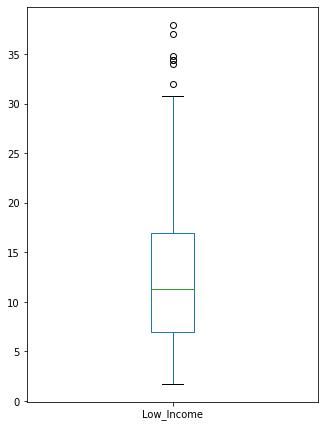

In [24]:
df_numerics = df[["Low_Income"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

# Outliers in 'Price'

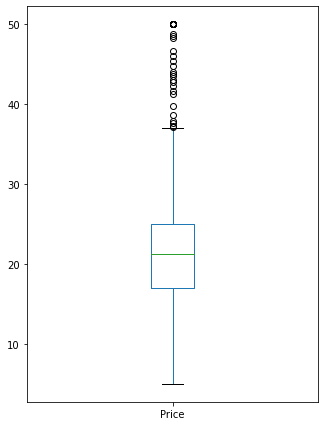

In [25]:
df_numerics = df[["Price"]]
df_numerics.plot(kind='box',  subplots=True, layout=(2, 4), figsize=(24, 16))
plt.show()

In [26]:
Q1_Price = df.Price.quantile(0.25)
Q3_Price = df.Price.quantile(0.75)

IQR_Price = Q3_Price - Q1_Price

lower_limit_Price = Q1_Price - 1.5*IQR_Price
upper_limit_Price = Q3_Price + 1.5*IQR_Price

print(f"Acceptable range of values for Price: {lower_limit_Price, upper_limit_Price}\n")

print("Outlier Values:")

df_Price_outliers = df.Price[(df.Price > upper_limit_Price) | (df.Price < lower_limit_Price)]
df_Price_outliers

Acceptable range of values for Price: (5.0, 37.0)

Outlier Values:


97     38.7
98     43.8
157    41.3
161    50.0
162    50.0
163    50.0
166    50.0
179    37.2
180    39.8
182    37.9
186    50.0
195    50.0
202    42.3
203    48.5
204    50.0
224    44.8
225    50.0
226    37.6
228    46.7
232    41.7
233    48.3
253    42.8
256    44.0
257    50.0
261    43.1
262    48.8
267    50.0
268    43.5
280    45.4
282    46.0
283    50.0
291    37.3
368    50.0
369    50.0
370    50.0
371    50.0
372    50.0
Name: Price, dtype: float64

**Response.** 

In the data for Price, there are **no extreme outliers.**

These outliers only differs from the upper or lower limit moderately. Since, these outliers are **not signficant enough** to affect the analysis between it and other dependent variables. In addition, the outlier values may provide invaluable insight for the exploratory analysis, hence we will be keeping the values of the outliers.

Furthermore, we have researched that pricing of a house is affected by a multitude of reasons, contributed by all the other 12 attributes in the dataset. Hence, these outliers are an outcome of these factors and should not be removed as it will affect our analysis.
 

**c.** For categorical variables, perform the necessary encoding.

**Response.** 

In [27]:
X = {'Low' : 1, 'Moderate' : 2, 'High' : 3} 
df["Crime_Rate_Enc"] = df.Crime_Rate.map(X)

X = {'Very Low' : 1, 'Low' : 2, 'Moderate' : 3, 'High' : 4, 'Very High' : 5} 
df["Residential_Area_Enc"] = df.Residential_Area.map(X)

encoding = {"Near":0, "Far":1}
df["River_Encoded"] = df["River"].map(encoding)

X = {'Low' : 1, 'Moderate' : 2, 'High' : 3} 
df["Highway_Access_Enc"] = df.Highway_Access.map(X)

In [28]:
df.sample(10)

,Crime_Rate,Residential_Area,Non_Retail,River,Pollutants,Rooms,Old_Housing,Distance_Office,Highway_Access,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price,Crime_Rate_Enc,Residential_Area_Enc,River_Encoded,Highway_Access_Enc
76,Low,Very Low,12.83,Far,0.437,6.279,74.5,4.0522,Moderate,398,18.7,11.97,20.0,1,1,1,2
258,Low,Low,3.97,Far,0.647,7.333,100.0,1.8946,Moderate,264,13.0,7.79,36.0,1,2,1,2
220,Low,Very Low,6.20,Near,0.507,6.951,88.5,2.8617,Moderate,307,17.4,9.71,26.7,1,1,0,2
480,Moderate,Very Low,18.10,Far,0.532,6.242,102.0,3.4242,High,666,20.2,10.74,23.0,2,1,1,3
9,Low,Very Low,7.87,Far,0.524,6.004,85.9,6.5921,Moderate,311,15.2,17.10,18.9,1,1,1,2
205,Low,Very Low,10.59,Far,0.489,5.891,22.3,3.9454,Moderate,277,18.6,10.87,22.6,1,1,1,2
127,Low,Very Low,21.89,Far,0.624,5.693,96.0,1.7883,Moderate,437,21.2,17.19,16.2,1,1,1,2
17,Low,Very Low,8.14,Far,0.538,5.990,81.7,4.2579,Moderate,307,21.0,14.67,17.5,1,1,1,2
152,Low,Very Low,19.58,Near,0.871,5.012,88.0,1.6102,Moderate,403,14.7,12.12,15.3,1,1,0,2
404,High,Very Low,18.10,Far,0.693,5.531,85.4,1.6074,High,666,20.2,27.38,8.5,3,1,1,3


### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

**Response.** 

# Summary Statistics of all numerical data

In [29]:
df[["Non_Retail", "Pollutants", "Rooms", "Old_Housing", "Distance_Office", "Tax_Rate", "Student_Teacher_Ratio", "Low_Income", "Price"]].describe()


,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Student_Teacher_Ratio,Low_Income,Price
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,11.176592,0.555722,6.287529,69.076065,3.804666,411.012170,18.450710,12.628174,22.579919
std,6.891814,0.116785,0.709092,28.512406,2.129602,169.651292,2.161325,7.164577,9.265906
min,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,5.190000,0.448000,5.885000,45.000000,2.086900,281.000000,17.300000,6.920000,17.000000
50%,9.690000,0.538000,6.209000,78.700000,3.112100,334.000000,19.100000,11.340000,21.200000
75%,18.100000,0.624000,6.629000,94.600000,5.231100,666.000000,20.200000,16.940000,25.000000
max,27.740000,0.871000,8.780000,102.000000,12.126500,711.000000,22.000000,37.970000,50.000000


# Summary Statistics of Categorical Data

### Crime Rate

In [30]:
print("Mode of crime rate is \033[1m%s\033[0m" % stats.mode(df['Crime_Rate']))
print(f"Crime rate total count for each category (Low, Moderate or High)")

df['Crime_Rate'].value_counts()

Mode of crime rate is Low
Crime rate total count for each category (Low, Moderate or High)


Low         372
Moderate    103
High         18
Name: Crime_Rate, dtype: int64

In [31]:
print("Percentage of crime rate attributed to each category")
df['Crime_Rate'].value_counts()/df['Crime_Rate'].value_counts().sum()

Percentage of crime rate attributed to each category


Low         0.754564
Moderate    0.208925
High        0.036511
Name: Crime_Rate, dtype: float64

### Residential Area

In [32]:
print("Mode of Residential_Area is \033[1m%s\033[0m" % stats.mode(df['Residential_Area']))
print(f"Residential area total count for each category (Very High, High, Moderate, Low or Very Low)")

df['Residential_Area'].value_counts()

Mode of Residential_Area is Very Low
Residential area total count for each category (Very High, High, Moderate, Low or Very Low)


Very Low     376
Low           60
Very High     29
Moderate      18
High          10
Name: Residential_Area, dtype: int64

In [33]:
print("Percentage of residential area attributed to each category")
df['Residential_Area'].value_counts()/df['Residential_Area'].value_counts().sum()

Percentage of residential area attributed to each category


Very Low     0.762677
Low          0.121704
Very High    0.058824
Moderate     0.036511
High         0.020284
Name: Residential_Area, dtype: float64

### River

In [34]:
print("Mode of River is \033[1m%s\033[0m" % stats.mode(df['River']))
print(f"River total count for each category (Near or Far)")

df['River'].value_counts()

Mode of River is Far
River total count for each category (Near or Far)


Far     459
Near     34
Name: River, dtype: int64

In [35]:
print("Percentage of river attributed to each category")
df['River'].value_counts()/df['River'].value_counts().sum()

Percentage of river attributed to each category


Far     0.931034
Near    0.068966
Name: River, dtype: float64

### Highway Access

In [36]:
print("Mode of highway access is \033[1m%s\033[0m" % stats.mode(df['Highway_Access']))
print(f"Highway access total count for each category (High, Moderate or Low)")

df['Highway_Access'].value_counts()

Mode of highway access is Moderate
Highway access total count for each category (High, Moderate or Low)


Moderate    282
High        130
Low          81
Name: Highway_Access, dtype: int64

In [37]:
print("Percentage of highway access attributed to each category")
df['Highway_Access'].value_counts()/df['Highway_Access'].value_counts().sum()

Percentage of highway access attributed to each category


Moderate    0.572008
High        0.263692
Low         0.164300
Name: Highway_Access, dtype: float64

**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 




# Data visualisation for numerical data

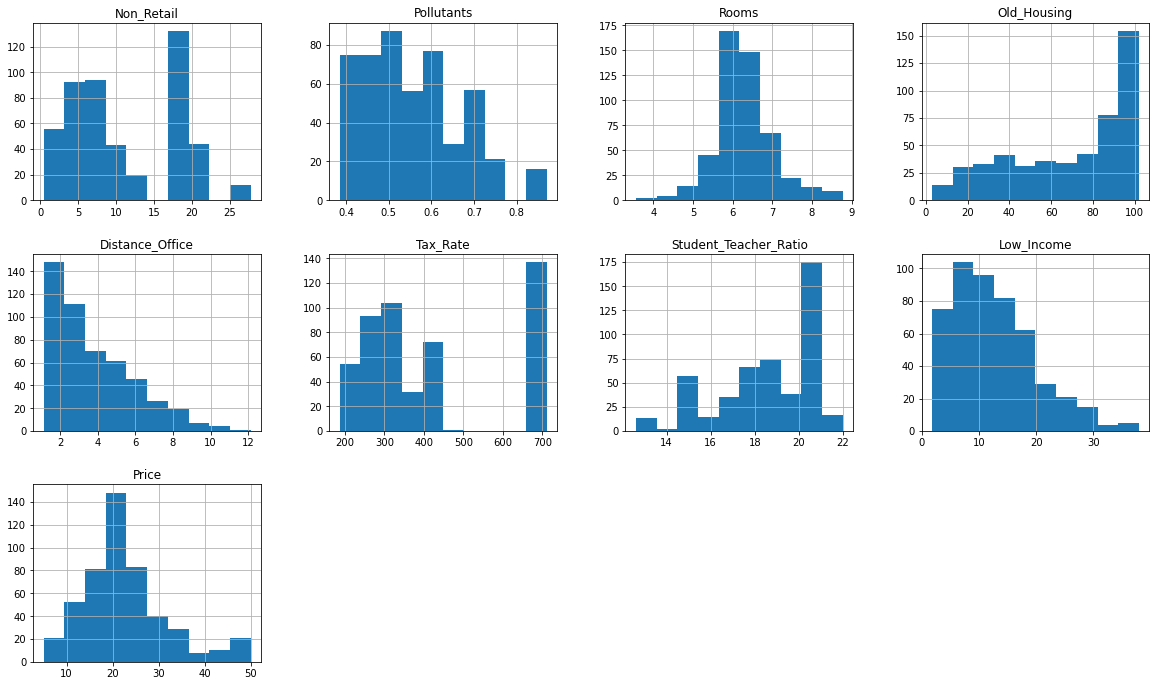

In [38]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income", "Price"]]
df_numerics.hist(layout=(4, 4), figsize=(20, 16))
plt.show()

### Key Observations for Numerical Data

Looking at the histogram chart for "Rooms" we can observe that most housing have 6-7 rooms.

Looking at the histogram chart for "Distance_office" we can observe that most housing are within the distance of 1-3km to major office areas.

Looking at the histogram chart for "Price" we can observe that most housing are priced around $20,000.

Looking at the histogram chart for "Low_Income", we can observe that the percentage of low income for each town is generally less than 20% which shows that the citizens from the region are quite affluent.



# Data visualisation for Categorical data

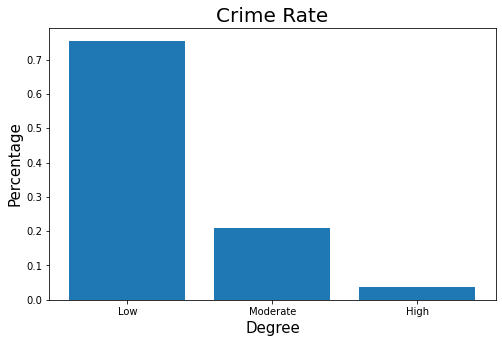

In [39]:
df["Crime_Rate"] = df["Crime_Rate"].astype(str)     
data = df["Crime_Rate"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.title("Crime Rate",fontsize=20)
plt.xlabel("Degree",fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.bar(xs, ys)
plt.show()

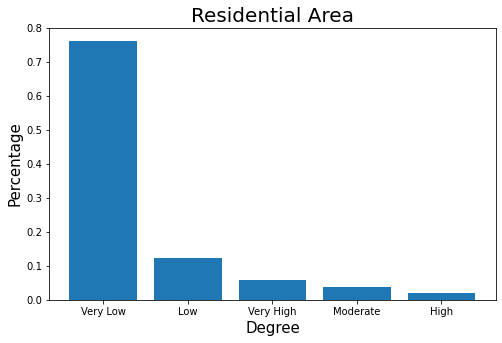

In [40]:
df["Residential_Area"] = df["Residential_Area"].astype(str)     
data = df["Residential_Area"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.title("Residential Area", fontsize=20)
plt.xlabel("Degree",fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.bar(xs, ys)
plt.show()

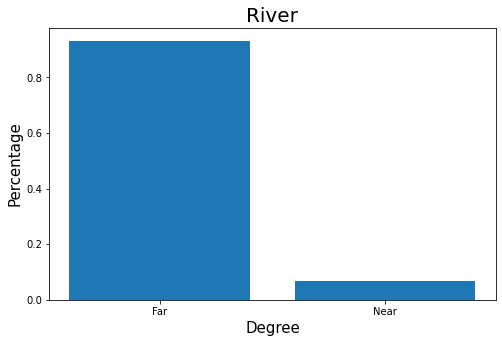

In [41]:
df["River"] = df["River"].astype(str)     ## convert the variable to a string so that it is treated categorical
data = df["River"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.title("River", fontsize=20)
plt.xlabel("Degree", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.bar(xs, ys)
plt.show()

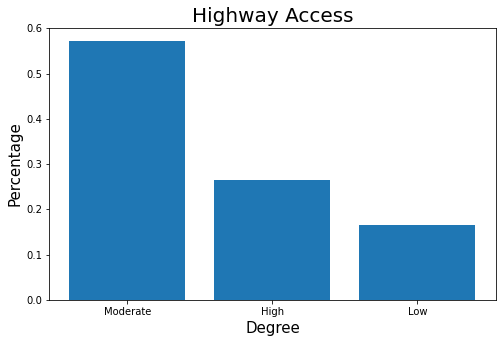

In [42]:
df["Highway_Access"] = df["Highway_Access"].astype(str)     
data = df["Highway_Access"].value_counts(normalize=True)

xs = data.index
ys = data

plt.figure(figsize=(8,5))
plt.title("Highway Access", fontsize=20)
plt.xlabel("Degree", fontsize=15)
plt.ylabel("Percentage", fontsize=15)
plt.bar(xs, ys)
plt.show()

### Key Observations for Categorical Data




Generally, there is a very low proportion of residential area in the region and experiences low crime rate. Additionally, most of the housing are far from the river and have moderate highway acccessibility. With that being said, we can conclude that the region is urbanised and modern.

**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

The following are the variable pairs that we have decided to investigate:

1.Rooms and price

2.Crime Rate and low income

3.Low Income and price

4.Low income and rooms

5.Pollutants and old_housing

6.Non-retail and distance office

7.Residental Area and Highway Access

**1. Rooms and Price**

We have decided to investigate rooms and price as we have researched that price should be directly proportional to the number of rooms. This is supported by the fact that more rooms per house would increase production cost such as higher raw material cost and higher cost of land. Hence, we have chosen these 2 variables to investigate and validate our hypothesis.

**2. Crime Rate and low income**

We also observed that for some towns with higher percentage of low-income households, there seem to be a trend that crime rates are increasing. Hence, we have decided to perform an analysis to prove this further.

**3. Low Income and Price**

We chose these two variables because we wanted to investigate whether our hypothesis that lower income households would lead to lower price of houses as the lower income households will have a lower gross income. Thus they are more likely to spend less on servicing their housing loan. Hence, we have decided to investigate further to prove this.

**4. Low Income and Rooms**

We choose this two variables because we wanted to investigate whether our hypothesis that lower income households would lead to less rooms of occupants houses as the lower income households will have a lower gross income and thus are more likely to spend less on servicing their housing loan. Fewer rooms per house would decresae raw material cost and cost of land , therefore decreasing the price of the house. Thus, those of lower income will spend less on housing and therefore their houses will have less rooms. Hence, we have decided to investigate the relation between the percentage of low income households and pricing of homes.

**5. Pollutants and Old Housing**

We choose this two variables because we wanted to investigate whether our hypothesis that more older housing would lead to more pollutants as the those older housing would be more neglected by their residents and community as whole. Also, their appliances that the occupants use in these old housing are more out-dated and are less environmentally-friendly. We also felt that with more pollutants in the town, there will be less incentives to build new housings in the town. Thus, we have decided to analysis further on this issue to see if it is accurate.

**6. Non Retail and Distance Office**

As non retail refers to the percentage of business areas used for non-retail, less percentage of non retail might indicate a lower need for weighted distance to office areas to be closer as well. We choose this two variables because we wanted to investigate whether our hypothesis that higher non-retail buisnesses would lead to shorter distance from office. We pressumed that households working at non-retail would probably be office workers and thus would need accomodation near their office as compared to requiring an accomodation near shopping districts. Hence, we decided to investigate the relation between non retail and distance office to see analysis how these factors influence each other.

**7. Residental Area and Highway Access**

Lastly, we also wish to investigate how does the ease of highway access relates to the proportion of residental area. From our intuition, we believe that with greater highway accessibility, it will be more convenient for residents to commute and travel to their destinations, hence encouraging more residental areas to be built around these area. Thus, we will investigate these 2 factors to confirm our hypothesis.

# 1. Rooms and Price

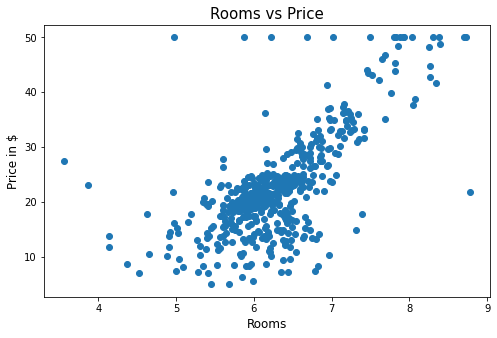

 correlation coefficient ( 𝜌 ) between Rooms and Price is 
 [[1.         0.69408567]
 [0.69408567 1.        ]]

variance of Rooms and Price is 
 Var(Room): 0.5028108106169297
 Var(Price): 85.8570146275501

covariance between between Rooms and Price is 
 [[ 0.50281081  4.56040354]
 [ 4.56040354 85.85701463]]



In [43]:
#from scipy import stats

#Bivariate analysis between Rooms and Price
xs = df.Rooms
ys = df.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Rooms vs Price", fontsize=15)
plt.xlabel("Rooms", fontsize=12)
plt.ylabel("Price in $", fontsize=12)
plt.show()

corr = np.corrcoef(xs, ys) 
corr
print(f" correlation coefficient ( 𝜌 ) between Rooms and Price is \n {corr}\n")

varx = xs.var() 
vary = ys.var() 
print(f"variance of Rooms and Price is \n Var(Room): {varx}\n Var(Price): {vary}\n")

cov = np.cov(xs, ys)
print(f"covariance between between Rooms and Price is \n {cov}\n")

#beta1, beta0, r, _, _, = stats.linregress(xs, ys)
#print("beta1 :", beta1)
#print("beta0 :", beta0)
#print("r squared :", r*r)  # r squared computation 




Value of correlation coefficient is 0.69408567. Since it is a positive covariance and a value almost reaching 0.7, we can conclude a moderately strong relationship between rooms and price of unit, and that the higher the number of rooms , the higher the price of the unit.

Thus, room and price of unit has a moderately strong relationship that is directly proportional with each other.  

# 2. Crime Rate and Low Income

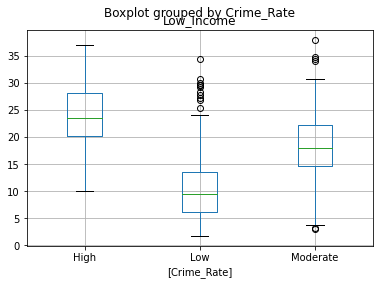

In [44]:
#Bivariate analysis between Crime Rate and Low Income

df[['Low_Income','Crime_Rate']].boxplot(by='Crime_Rate')
plt.show()

The relationship that can be observed from the box plot above is that the housing with higher percentage of low income household will tend to see "High"
crime rates.

# 3. Low Income and Price

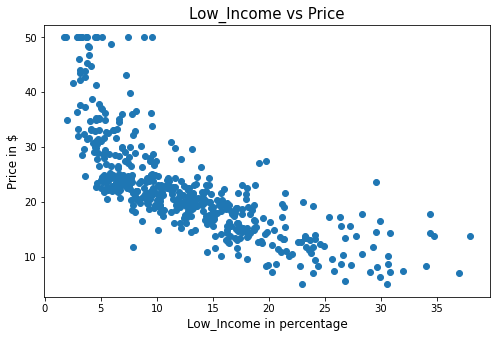

 correlation coefficient ( 𝜌 ) between Low Income and Price is 
 [[ 1.         -0.73871535]
 [-0.73871535  1.        ]]

variance of Low Income and Price is 
 Var(Low Income): 51.33116495324791
 Var(Price): 85.8570146275501

covariance between between Low Income and Price is 
 [[ 51.33116495 -49.04057738]
 [-49.04057738  85.85701463]]



In [45]:
#Bivariate analysis between Low Income and price
xs = df.Low_Income
ys = df.Price

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Low_Income vs Price", fontsize=15)
plt.xlabel("Low_Income in percentage", fontsize=12)
plt.ylabel("Price in $", fontsize=12)
corr = np.corrcoef(xs, ys) 
plt.show()

corr = np.corrcoef(xs, ys) 
corr
print(f" correlation coefficient ( 𝜌 ) between Low Income and Price is \n {corr}\n")

varx = xs.var() 
vary = ys.var() 
print(f"variance of Low Income and Price is \n Var(Low Income): {varx}\n Var(Price): {vary}\n")

cov = np.cov(xs, ys)
cov
print(f"covariance between between Low Income and Price is \n {cov}\n")

The relationship between low income and price of housing is that the lower the percentage of low income earners , the higher the  prices in their units. As ( 𝜌 ) between Low Income and prices is a negative value of -0.73872 (5 s.f), we can conclude that the two variables are strong correlated.

Thus, low income and price of housing has a strong relationship that is inversely proportional with each other.  

# 4. Low Income and Rooms

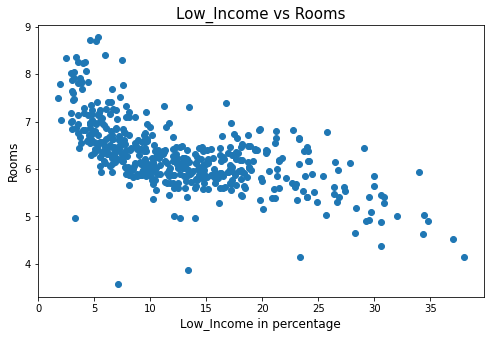

 correlation coefficient ( 𝜌 ) between Low Income and Rooms is 
 [[ 1.         -0.61759956]
 [-0.61759956  1.        ]]

variance of Low Income and Rooms is 
 Var(LowIncome): 51.33116495324791
 Var(Rooms): 0.5028108106169297

covariance between between Low Income and Rooms is 
 [[51.33116495 -3.13761635]
 [-3.13761635  0.50281081]]



In [46]:
#Bivariate analysis between Low Income and Rooms
xs = df.Low_Income
ys = df.Rooms

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Low_Income vs Rooms", fontsize=15)
plt.xlabel("Low_Income in percentage", fontsize=12)
plt.ylabel("Rooms", fontsize=12)
corr = np.corrcoef(xs, ys) 
plt.show()

corr = np.corrcoef(xs, ys) 
corr
print(f" correlation coefficient ( 𝜌 ) between Low Income and Rooms is \n {corr}\n")

varx = xs.var() 
vary = ys.var() 
print(f"variance of Low Income and Rooms is \n Var(LowIncome): {varx}\n Var(Rooms): {vary}\n")

cov = np.cov(xs, ys)
cov
print(f"covariance between between Low Income and Rooms is \n {cov}\n")

The relationship between low income and rooms is that the higher the percentage of low income earners , the lower the number of rooms per unit. As ( 𝜌 ) between Low Income and Rooms is -0.61760 (5 s.f), we can conclude that the two variables has a moderately strong relation.

Thus, low income and number of rooms per unit has a  relatively strong relationship that is inversely proportional with each other.

# 5. Pollutants and Old Housing

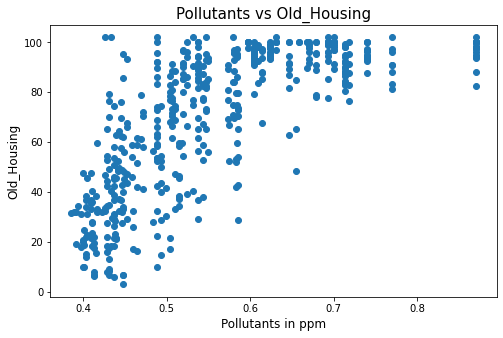

 correlation coefficient ( 𝜌 ) between Pollutants and Old Housing is 
 [[1.         0.72421948]
 [0.72421948 1.        ]]

variance of Pollutants and Old Housing is 
 Var(Poullutants): 0.013638736691238287
 Var(Old Housing): 812.957271475455

covariance between between Pollutants and Old Housing is 
 [[1.36387367e-02 2.41152149e+00]
 [2.41152149e+00 8.12957271e+02]]



In [47]:
#Bivariate analysis between Pollutants and old housing
xs = df.Pollutants
ys = df.Old_Housing

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Pollutants vs Old_Housing", fontsize=15)
plt.xlabel("Pollutants in ppm", fontsize=12)
plt.ylabel("Old_Housing", fontsize=12)
corr = np.corrcoef(xs, ys) 
plt.show()

corr = np.corrcoef(xs, ys) 
corr
print(f" correlation coefficient ( 𝜌 ) between Pollutants and Old Housing is \n {corr}\n")

varx = xs.var() 
vary = ys.var() 
print(f"variance of Pollutants and Old Housing is \n Var(Poullutants): {varx}\n Var(Old Housing): {vary}\n")

cov = np.cov(xs, ys)
cov
print(f"covariance between between Pollutants and Old Housing is \n {cov}\n")

The relationship between pollutants and number of old housing is that the higher the number of old housing , the more pollutants there in the atmosphere. As ( 𝜌 ) between Low Income and Rooms is 0.72422 (5 s.f), we can conclude that the two variables are strong correlated.

Thus, pollutants and percentage of old housing has a strong relationship that is directly proportional with each other.

# 6. Non Retail and Distance Office

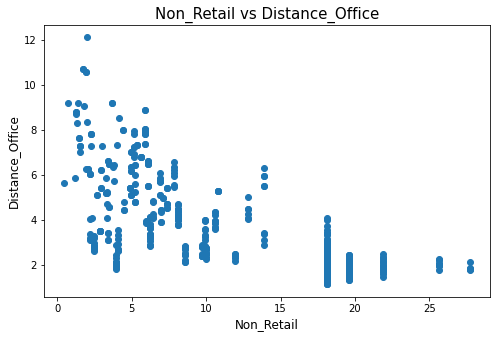

 correlation coefficient ( 𝜌 ) between Non Retail and Distance Office is 
 [[ 1.        -0.7141315]
 [-0.7141315  1.       ]]

variance of Non Retail and Distance Office is 
 Var(NonRetail): 47.497098120021455
 Var(DistanceOffice): 4.535206403320713

covariance between between Non Retail and Distance Office is 
 [[ 47.49709812 -10.48118193]
 [-10.48118193   4.5352064 ]]



In [48]:
#Bivariate analysis between  Non retail and distance office
xs = df.Non_Retail
ys = df.Distance_Office

plt.figure(figsize=(8,5))
plt.scatter(xs, ys)
plt.title("Non_Retail vs Distance_Office", fontsize=15)
plt.xlabel("Non_Retail", fontsize=12)
plt.ylabel("Distance_Office", fontsize=12)
corr = np.corrcoef(xs, ys) 
plt.show()

corr = np.corrcoef(xs, ys) 
corr
print(f" correlation coefficient ( 𝜌 ) between Non Retail and Distance Office is \n {corr}\n")

varx = xs.var() 
vary = ys.var() 
print(f"variance of Non Retail and Distance Office is \n Var(NonRetail): {varx}\n Var(DistanceOffice): {vary}\n")

cov = np.cov(xs, ys)
cov
print(f"covariance between between Non Retail and Distance Office is \n {cov}\n")

The relationship between non-retail and distance from office is that the higher the number of non-retail businesses , the shorter the distance the houses are from the office. As ( 𝜌 ) between Low Income and Rooms is -0.71413 (5 s.f), we can conclude that the two variables are strongly correlated.

Thus, percentage of business area used for non retail and distance of office areas has a strong relationship that is inversely proportional with each other.

# 7. Residental area and Highway Access

We wish to investigate whether residental area is dependent on highway access.

In [49]:
table = pd.crosstab(df.Residential_Area, df.Highway_Access)


residental_areas = table["High"]["High"] + table["Low"]["High"] + table["Moderate"]["High"] + table["High"]["Low"] + table["Low"]["Low"] + table["Moderate"]["Low"]+ table["High"]["Moderate"] + table["Low"]["Moderate"] + table["Moderate"]["Moderate"]+ table["High"]["Very High"] + table["Low"]["Very High"] + table["Moderate"]["Very High"]+ table["High"]["Very Low"] + table["Low"]["Very Low"] + table["Moderate"]["Very Low"]

# we will sum up high-very high together as high , and low-very low together as low

high_residental_proportion = table["High"]["High"] + table["Low"]["High"] + table["Moderate"]["High"] + table["High"]["Very High"] + table["Low"]["Very High"] + table["Moderate"]["Very High"]

#ignoring for moderate
#moderate_residental_proportion = table["High"]["Moderate"] + table["Low"]["Moderate"] + table["Moderate"]["Moderate"]

low_residental_proportion = table["High"]["Low"] + table["Low"]["Low"] + table["Moderate"]["Low"] + table["High"]["Very Low"] + table["Low"]["Very Low"] + table["Moderate"]["Very Low"]

high_highwayaccess = table["High"]["High"] + table["High"]["Low"] + table["High"]["Moderate"] + table["High"]["Very High"] + table["High"]["Very Low"] 

low_highwayaccess = table["Low"]["High"] + table["Low"]["Low"] + table["Low"]["Moderate"] + table["Low"]["Very High"] + table["Low"]["Very Low"]

#ignoring for moderate
#moderate_highwayaccess = table["Moderate"]["High"] + table["Moderate"]["Low"] + table["Moderate"]["Moderate"] + table["Moderate"]["Very High"] + table["Moderate"]["Very Low"]

prob_high_resident_proportion = high_residental_proportion/residental_areas

#ignoring moderate
#prob_moderate_resident_proportion = high_moderate_proportion/residental_areas

prob_low_resident_proportion = low_residental_proportion/residental_areas

prob_high_resident_proportion_given_high_highwayaccess = (table["High"]["High"] + table["High"]["Very High"])/high_highwayaccess
prob_high_resident_proportion_given_low_highwayaccess = (table["Low"]["High"] + table["Low"]["Very High"])/low_highwayaccess

prob_low_resident_proportion_given_high_highwayaccess = (table["High"]["Low"] + table["High"]["Very Low"])/high_highwayaccess
prob_low_resident_proportion_given_low_highwayaccess = (table["Low"]["Low"] + table["Low"]["Very Low"])/low_highwayaccess

print(f"P(High Residental Proportion) : {prob_high_resident_proportion}")
print(f"P(Low Residental Proportion) : {prob_low_resident_proportion}")

print(f"P(High Residental Proportion|High highwayaccess) : {prob_high_resident_proportion_given_high_highwayaccess}")
print(f"P(High Residental Proportion|Low highwayaccess) : {prob_high_resident_proportion_given_low_highwayaccess}")

print(f"P(Low Residental Proportion|High highwayaccess) : {prob_low_resident_proportion_given_high_highwayaccess}")
print(f"P(Low Residental Proportion|Low highwayaccess) : {prob_low_resident_proportion_given_low_highwayaccess}")


table

P(High Residental Proportion) : 0.07910750507099391
P(Low Residental Proportion) : 0.8843813387423936
P(High Residental Proportion|High highwayaccess) : 0.0
P(High Residental Proportion|Low highwayaccess) : 0.2345679012345679
P(Low Residental Proportion|High highwayaccess) : 1.0
P(Low Residental Proportion|Low highwayaccess) : 0.7283950617283951


Highway_Access,High,Low,Moderate
Residential_Area,,,
High,0,5,5
Low,0,8,52
Moderate,0,3,15
Very High,0,14,15
Very Low,130,51,195


Probability of high residental proportion given high/low highway access is quite different from the unconditional probability of high residental proportion. The same applies for the probability of low residental proportion.

In addition, it seems that our hypothesis is wrong as having greater access to the highway seems to have lower residental proportion as shown in the results.

In [50]:
norm_table = pd.crosstab(df.Residential_Area, df.Highway_Access, normalize="index")
norm_table

Highway_Access,High,Low,Moderate
Residential_Area,,,
High,0.000000,0.500000,0.500000
Low,0.000000,0.133333,0.866667
Moderate,0.000000,0.166667,0.833333
Very High,0.000000,0.482759,0.517241
Very Low,0.345745,0.135638,0.518617


Normalisation of our data to make it more consistent for comparison.

<AxesSubplot:xlabel='Residential_Area'>

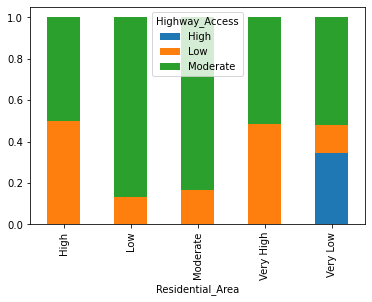

In [51]:
norm_table.plot.bar(stacked=True)

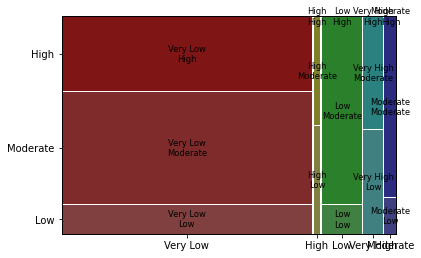

In [52]:
from statsmodels.graphics.mosaicplot import mosaic
_ = mosaic(df, ['Residential_Area','Highway_Access'])

## Part II: Modeling [12% of final grade]

### 1. Problem formulation [15% of Part II]

**a.** Formulate one regression problem and one classification based on the dataset, in **no more than 50 words**.

**Regression:** Our objective is to predict the percentage of Low Income households in a given area based on selected variables.

**Classification:**  Our objective is to predict the crime rate based on selected variables.


**b.** State which problem (regression or classification) you would be investigating and why, in **no more than 20 words**.

Regression. Low Income generally has higher correlation with other variables compared to crime rate in our EA, hence more accurate.

**c.** Clearly specify the dependent variable you are predicting, and its significance, in **no more than 20 words**

The dependent variable is percentage of Low Income households which signifies the quality of lives and welfare of citizens in towns.

### 2. Model training [30% of Part II]

**a.** Perform feature selection. For each variable, decide if you want to include it as a feature and provide a justification. You may leverage on your analysis in Part I: EDA and/or perform additional analysis.

In [53]:
datatypes = df.dtypes
categorical_features = datatypes[datatypes=="object"].index
numerical_features = datatypes[datatypes!="object"].index

## Categorical Variables

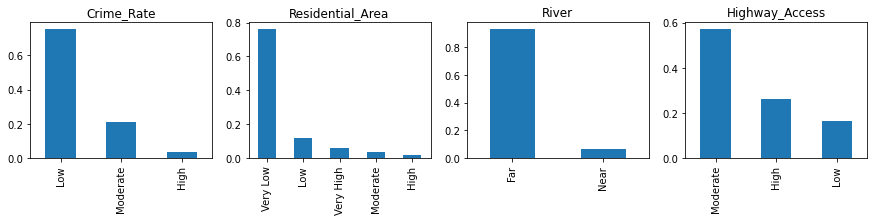

In [54]:
n = len(categorical_features)

r, c = 1,4
fig, ax = plt.subplots(r, c, figsize=(15,2.5))

for i in range(n):
    feature = categorical_features[i]
    ax = plt.subplot(r,c,i+1)
    ax.set_title(feature)
    df[feature].value_counts(normalize=True).plot(kind='bar')

plt.show()

To perform feature selection, we have decided to only select features without a dominant value. A lack of variation of data in these variables means that there will be very less explanatory power on the variation in our dependent variable, percentage of low income.

Hence, we will only select categorical features with datas having the least dominant value.

The following below will be how we perform the feature selection.

Since all the categorical variables have a mode more than 50%, this means that none of the categorical factors have a significant impact or meaning for our regression analysis.

Our team decided to not be lenient with the requirement(mode more than 50%) and remove all the categorical factors since we have checked that we still have sufficient numericals features. 

Hence, we have decided to exclude all the categorical variables in our analysis for regression.

In [55]:
# get 'important' categorical features i.e. those with mode having freq < 50%

categorical_important = []

for feature in categorical_features:
    highest = df[feature].value_counts(normalize=True)[0]
    if highest<0.50:
        categorical_important.append(feature)

print(f"Variables with mode contributing <50% are : {categorical_important}")


Variables with mode contributing <50% are : []


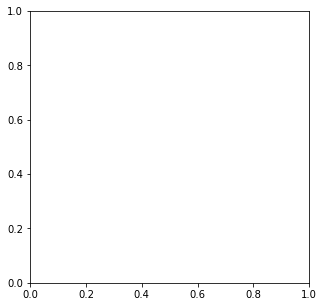

In [56]:
n = len(categorical_important)

r, c = 1,1
fig, ax = plt.subplots(r, c, figsize=(5,5))

for i in range(n):
    feature = categorical_important[::-1][i]
    ax = plt.subplot(r,c,i+1)
    df[[feature,'Price']].boxplot(by=feature, ax=ax, rot=90)

As mentioned, we have discovered that all of the categorical variables less explanatory power on the variation in our dependent variable, hence we will proceed without any of them.

## Numerical Variables

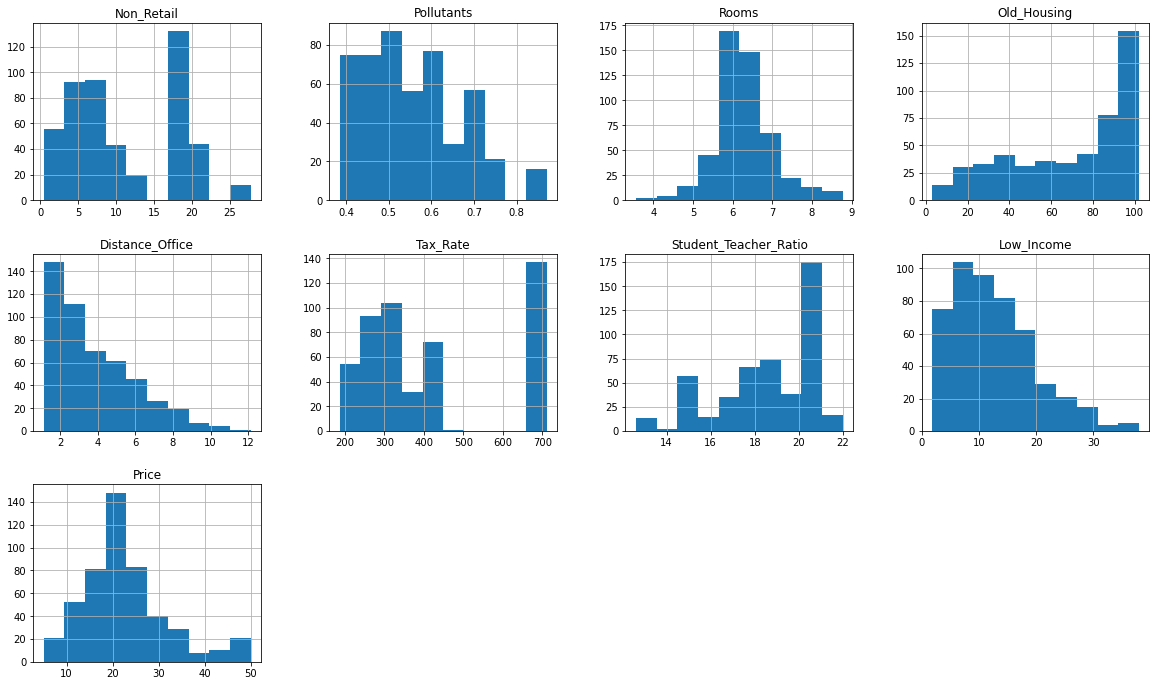

In [57]:
df_numerics = df[["Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Student_Teacher_Ratio","Low_Income", "Price"]]
df_numerics.hist(layout=(4, 4), figsize=(20, 16))
plt.show()

We have found the following variables to be more meaningful and relatable to a domain expert than the others, hence our preliminary variables are `Pollutants`, `Rooms`, `Old_Housing`, `Distance_Office` and `Low_Income`.

In [58]:
features_selected = ["Price","Non_Retail","Pollutants","Rooms","Old_Housing","Distance_Office","Tax_Rate","Low_Income"]
df[features_selected].corr()

,Price,Non_Retail,Pollutants,Rooms,Old_Housing,Distance_Office,Tax_Rate,Low_Income
Price,1.000000,-0.488755,-0.432208,0.694086,-0.365890,0.252058,-0.477415,-0.738715
Non_Retail,-0.488755,1.000000,0.770678,-0.396076,0.651445,-0.714132,0.725843,0.614801
Pollutants,-0.432208,0.770678,1.000000,-0.306967,0.724219,-0.772932,0.669054,0.593393
Rooms,0.694086,-0.396076,-0.306967,1.000000,-0.237646,0.207412,-0.298064,-0.617600
Old_Housing,-0.365890,0.651445,0.724219,-0.237646,1.000000,-0.745873,0.517270,0.591506
Distance_Office,0.252058,-0.714132,-0.772932,0.207412,-0.745873,1.000000,-0.540693,-0.501579
Tax_Rate,-0.477415,0.725843,0.669054,-0.298064,0.517270,-0.540693,1.000000,0.553406
Low_Income,-0.738715,0.614801,0.593393,-0.617600,0.591506,-0.501579,0.553406,1.000000


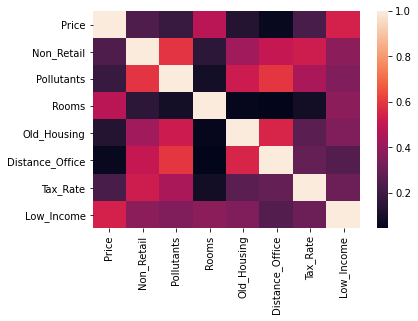

In [59]:
import seaborn as sns
r2 = df[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

From the previous step, we have calculated and displayed $r^2$ through a heatmap above for the independent variables with low income. From the heatmap above, we can identify that most of the variables have a high correlation with Low income with price having the highest corelation since the darker the box, the less the value of correlation.

Hence, to confirm the strongly correlated variables for our regression analysis, we have decided to use a function as follows:

In [60]:

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected = corr_features(df[features_selected],"Low_Income", 0.5) 
print(f"updated selected features: {features_selected}")

updated selected features: ['Price', 'Non_Retail', 'Pollutants', 'Rooms', 'Old_Housing', 'Distance_Office', 'Tax_Rate']


**b.** Split the dataset into train and test sets. Describe how you split step by step.

Now that we have obtained variables that are strongly correlated with our dependent variable, Price, we now have to check whether these variables are strongly correlated with one another to prevent redunancy. Hence, the following: 

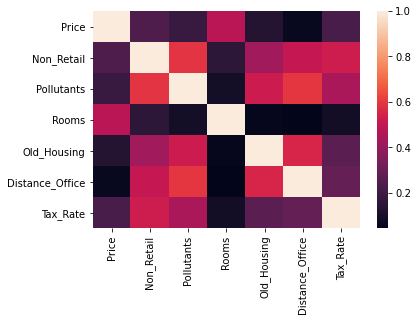

In [61]:
r2 = df[features_selected].corr()**2
sns.heatmap(r2)
plt.show()

In [62]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]

# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n

# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

In [63]:
features_selected = get_uncorr_features(df[features_selected], 0.7)
print(f"Final selected features : {features_selected}")

Final selected features : ['Price', 'Rooms', 'Distance_Office', 'Tax_Rate']


Our group has set a higher threshold of 0.7 than the generally guideline of 0.5. For this part, we have decided to be more lenient with the threshold to be inclusive of more features and we also felt that a coefficient of 0.7 is still acceptable to be tested in our model as it is a reasonable value from 0.5.

Thus, for a more accurate model in our linear regression analysis, we have decided to increase our threshold to 0.7 to include more features.

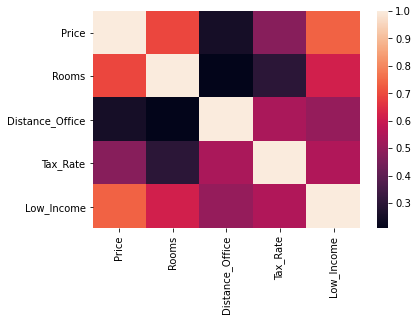

In [64]:
df[features_selected+['Low_Income']].corr()
r2 = abs(df[features_selected+['Low_Income']].corr())
sns.heatmap(r2)

plt.show()

**c.** State the model(s) you will train, and explain your choice(s), in **no more than 50 words per model**. You only need to
train one model, but if you do train more models, limit yourself to no more than three---Grading is based on the validity and soundness of your model, rather than the quantity.

Based on the selected features, we will only be taking `Price`, `Rooms`, `Distance_Office` and `Tax_Rate` from the numerical variables.

We use the model_selection package to split our dataset randomly into 75/25 i.e. we keep 25% of the dataset for model evaluation purpose

In [65]:
### train_test_split

from sklearn.model_selection import train_test_split

X = df[features_selected]
y = df[["Low_Income"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Linear:

Basic model that will be inclusive of all features that we have selected so that we can learn how each feature affects our dependent variable through its coefficient.

Ridge:

As compared to the linear model, it further regularise coefficient estimates by pushing the estimated coefficients toward 0. Hence, this avoids over-fitting for a more accurate model.  

Lasso: 

Similar to the ridge model, it also regularise coefficients but the estimated coefficient can actually be 0. Hence, it remove less significant features by reducing its coefficient to 0 for regression. Thus could possibly be more accurate through removal of unimportant features.


d. For each model, perform the training, and report the trained parameters and the training scores, if applicable.

In [66]:
## model fitting for linear regression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Model 1: Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1[0]}")
print(f"Intercept : {bias1[0]}")
print(f"Coeff of Determination : {model1_r2}")

Model 1: Linear Regression 
--------------------------
Features : ['Price', 'Rooms', 'Distance_Office', 'Tax_Rate']
Coefficients: [-0.37683738 -1.60347905 -0.91081094  0.00476425]
Intercept : 32.62549494589588
Coeff of Determination : 0.6703177082695848


In [67]:
## model fitting for ridge

from sklearn.linear_model import Ridge

model2 = Ridge().fit(X_train, y_train)
model2_r2 = model2.score(X_train, y_train)
coef2 = model2.coef_
bias2 = model2.intercept_

print("Model 2: Ridge Regression")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef2[0]}")
print(f"Intercept : {bias2[0]}")
print(f"Coeff of Determination : {model2_r2}")

Model 2: Ridge Regression
-------------------------
Features : ['Price', 'Rooms', 'Distance_Office', 'Tax_Rate']
Coefficients: [-0.37767582 -1.58728834 -0.91052733  0.00476884]
Intercept : 32.54012067793809
Coeff of Determination : 0.6703163270720363


In [78]:
## model fitting for lasso

from sklearn.linear_model import Lasso

model3 = Lasso().fit(X_train, y_train)
model3_r2 = model3.score(X_train, y_train)
coef3 = model3.coef_
bias3 = model3.intercept_

print("Model 3: Lasso Regression")
print("-------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef3}")
print(f"Intercept : {bias3[0]}")
print(f"Coeff of Determination : {model3_r2}")



Model 3: Lasso Regression
-------------------------
Features : ['Price', 'Rooms', 'Distance_Office', 'Tax_Rate']
Coefficients: [-0.44826566 -0.         -0.66165807  0.00694681]
Intercept : 22.360058302502537
Coeff of Determination : 0.6510829628860405


### 3. Model evaluation and selection [30% of Part II]

**a.** For each model, predict the response variable on the test set.

In [69]:
y_pred = model1.predict(X_test)
y_model = y_test.copy()
y_model.insert(1,"Model1_Low_Income_Predicted",y_pred)
y_pred = model2.predict(X_test)
y_model.insert(2,"Model2_Low_Income_Predicted",y_pred)
y_pred = model3.predict(X_test)
y_model.insert(3,"Model3_Low_Income_Predicted",y_pred)
y_model


,Low_Income,Model1_Low_Income_Predicted,Model2_Low_Income_Predicted,Model3_Low_Income_Predicted
467,21.32,16.661475,16.661058,16.743947
78,12.34,11.972936,11.973937,12.304035
323,11.74,13.568656,13.562844,12.937123
185,13.15,9.537216,9.528462,8.262088
345,10.53,10.765660,10.766873,11.658422
...,...,...,...,...
231,5.25,6.913346,6.923850,7.853429
425,24.39,21.477340,21.484066,22.002523
418,20.62,21.288565,21.295830,21.849188
334,6.75,9.891819,9.894113,10.363791


**b.** Describe the metric you use to evaluate your model(s). Report the test scores for each model.

In [70]:
## model 1 evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# predict based on test set
y_pred = model1.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Low_Income"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

print("Model 1 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 1 Evaluation
-----------------
MAE: 3.10
MAE as % of mean: 23.0%
RMSE: 4.09


In [71]:
## model 2 evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model2.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Low_Income"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

print("Model 2 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 2 Evaluation
-----------------
MAE: 3.10
MAE as % of mean: 23.0%
RMSE: 4.09


In [72]:
## model 3 evaluation

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model3.predict(X_test)

# compare with ground truth
mae = mean_absolute_error(y_test, y_pred)
ave = np.mean(y_test["Low_Income"])
rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

print("Model 3 Evaluation")
print("-----------------")
print(f"MAE: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave*100:.1f}%")
print(f"RMSE: {rmse:.2f}")

Model 3 Evaluation
-----------------
MAE: 3.17
MAE as % of mean: 23.5%
RMSE: 4.35


**c.** If you trained more than one model, identify the final model you would choose for the prediction task, and explain your choice, **in no more than 50 words**.

Our group has chosen Linear (model 1) for the prediction task as it has the lowest MAE and RMSE,thus more precise in predicting the "actual" value. Additonally, the linear model has a slightly higher value of determination indicating a better fit. The model gives the following equation:

\begin{equation}
 Low_Income = 32.625 -0.37683 \times Price  -1.6034 \times Rooms -0.91081 \times Distance_Office + 0.00476425 \times Tax_Rate
\end{equation}

### 4. Findings and conclusion [20% of Part II]

**a.** Interpret what your model is implying, and summarize any insight you have drawn from the project. Explain if it is consistent with intuition, and if not, provide a plausible justification. Limit your entire response to **50 words**.

Low_Income is 32.625 when unaffected by variables, otherwise lowIncome is inversely proportional to Rooms, DistanceOffice, Price in descending order of magnitude of coefficient. LowIncome is directly proportional to TaxRate.

Prediction is off by an absolute value of 3.10 which is 23% of the mean thus our predictions are off 23% on average.


**Response.** 

**b.** Share any lesson you have learned from the project, in **no more than 50 words**.

This project allowed us to gain a myriad skills. We learned to apply our statistical knowledge by studying a large, real-world data set using Python, Numpy, Pandas, etc. We learnt to appreciate the art of visualising data and finding meaningful insights, as our intuition may not always be in-line with data.

### 5. Non-technical protocol [5% of Part II]

**a.** Describe the detailed contribution of each team member, including both the tangible (e.g., implementation, testing, writing) and intangible (e.g., generating ideas, planning, leadership) efforts.

Our team had worked well together, with every member contributing to the project in one way or another. Even though not every task was done as a full team, we ensured to always inform each other on the progress of the project and every member was up to date on the progress. Any issues we had with the project was raised in our groupchat. We were able to collaborate and come to an agreement on issues easily. Each member had contributed ideas, and were good team players.

Our team had split the workload into two teams, with one team being responsible for the programming (Zhao Xing, Yuan Sheng, Tan Zheng) and another team being responsible for communicating the team's findings (Shao Dong, Novia). 

Programming Team:
This team was responsible for generating the outputs using the various python frameworks. They troubleshooted the issues that we had regarding the implementing the code. The team had great problem-solvers. This team worked together with the communication team to decide critical deicisions.

Communication Team:
This team was responsible for documentation and communicating key observations from the data. They also handled outliers in the pre-processing phase, and made critical decisions that required domain knowledge and strong communication skills to explain insights from the analysis of data.


**b.** List any references and sources you have cited.

liner regression choice -https://medium.com/mlearning-ai/linear-regression-vs-ridge-regression-vs-lasso-regression-467d0df39cc9
https://towardsdatascience.com/whats-the-difference-between-linear-regression-lasso-ridge-and-elasticnet-8f997c60cf29

Selection of r^2 range - 
https://link.springer.com/article/10.1057/jt.2009.5#:~:text=Values%20between%200%20and%200.3,through%20a%20shaky%20linear%20rule.&text=Values%20between%200.3%20and%200.7,a%20fuzzy%2Dfirm%20linear%20rule.